# Zomato sales Analysis

## Importing required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Csv file

In [90]:
df= pd.read_csv(r"C:\Users\nagar\OneDrive\Desktop\New folder\Zomato data .csv")


In [9]:
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [10]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

#### converting the data type of "Rate" column to float and removing denominator

In [17]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)


In [20]:
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Conclusion; There is no Null Value in The data frame

In [22]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

# Exploratory Data Analysis

## Type of Resturant

Text(0.5, 0, 'Type of Restaurant')

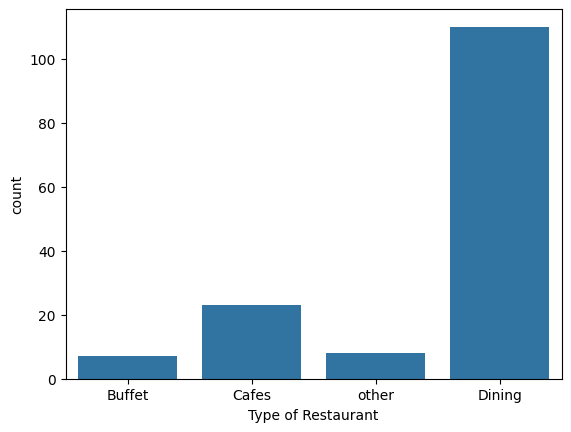

In [24]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

### Conclusion: The Majority of the restaurants fall into the Dining Category

### Votes

Text(0.5, 0, 'Type of Restaurant')

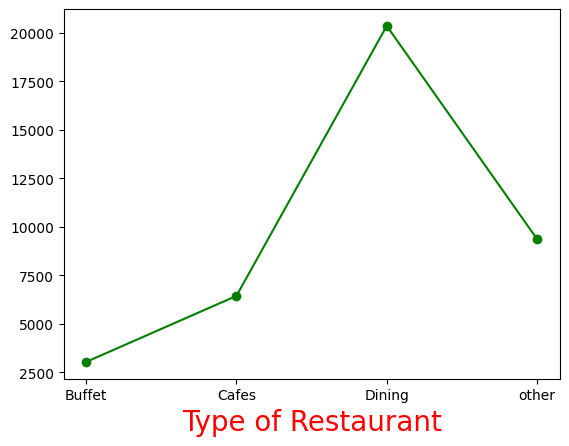

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the relevant data
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of Restaurant", color="red", size=20)

### Majority of restaurants Received ratings

In [107]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)

### Rate

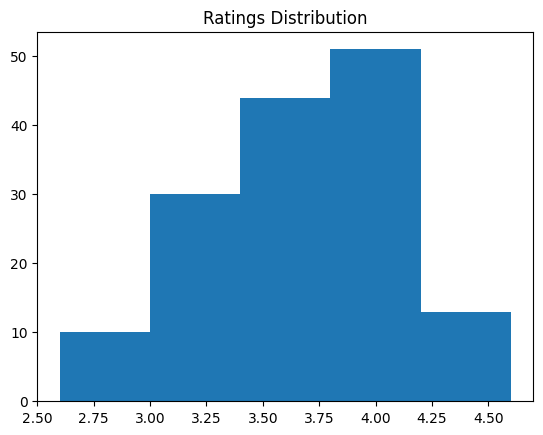

In [57]:
plt.hist(df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

### Conclusion: The Majority of restaurants received ratings ranging from 3.5 to 4

In [62]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

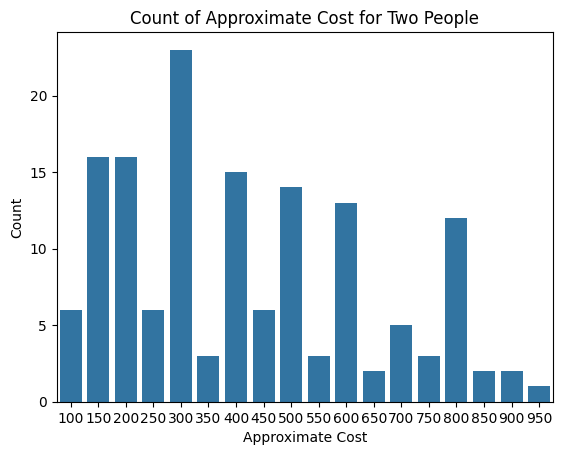

In [66]:
couple_data = df['approx_cost(for two people)']

# Corrected function call
sns.countplot(x=couple_data)
plt.title("Count of Approximate Cost for Two People")
plt.xlabel("Approximate Cost")
plt.ylabel("Count")
plt.show()

### The Majority of couples prefer restaurants with an Approximate cost of 300 rupess

<Axes: xlabel='online_order', ylabel='rate'>

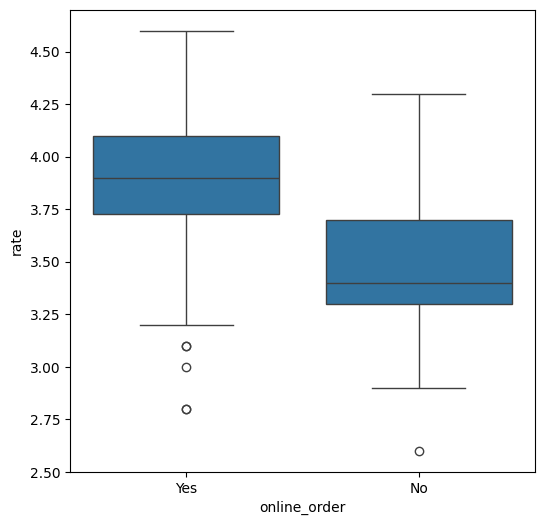

In [93]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data= df)
           

### conclusion: Offline orders received Lower ratings in comparison to online orders, Which obtained excellent ratings.

In [108]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)

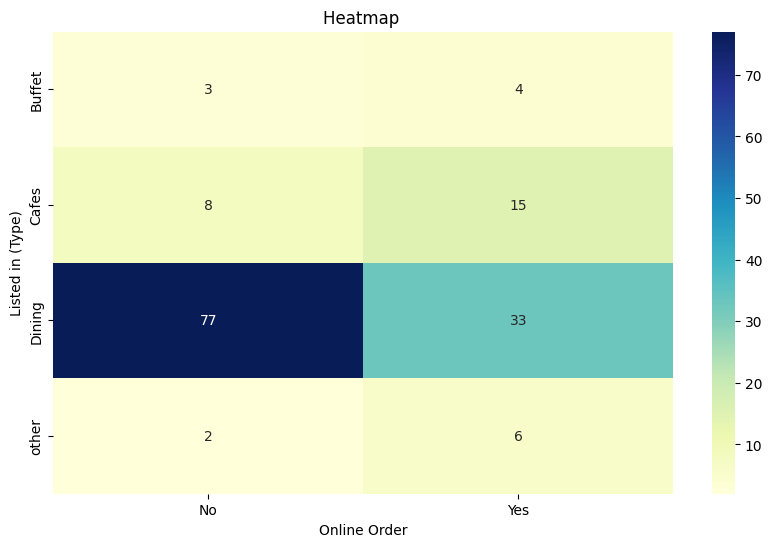

In [112]:
# Create a pivot table
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')

# Adding titles and labels
plt.title("Heatmap ")
plt.xlabel("Online Order")
plt.ylabel("Listed in (Type)")
plt.show()

### conclusion: Dining restaurants primarily accept offline orders, where as cafes primarily receive online orders, this Suggests thst clients prefer to place orders in person at restaurants but prefer online ordering at cafes.